<a href="https://colab.research.google.com/github/mwebberclay/Netflix-Content-Analysis/blob/main/Netflix_Content_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Display the first 5 rows
print(df.head())

# Get basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [3]:
# Fill missing values in the 'country' column with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

# Drop rows with missing 'rating' and 'duration'
df.dropna(subset=['rating', 'duration'], inplace=True)

# Check for missing values again
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2631
cast             825
country            0
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


<ipython-input-3-477a5fdfdad6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


<ipython-input-4-ee34f87947d5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='viridis')


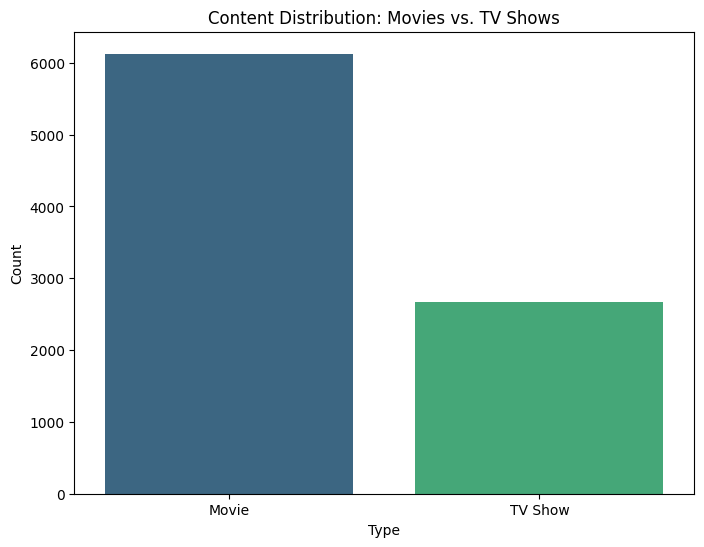

In [4]:
# Count the number of movies and TV shows
content_type_counts = df['type'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=content_type_counts.index, y=content_type_counts.values, palette='viridis')
plt.title("Content Distribution: Movies vs. TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

<ipython-input-5-bd0113d669c4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


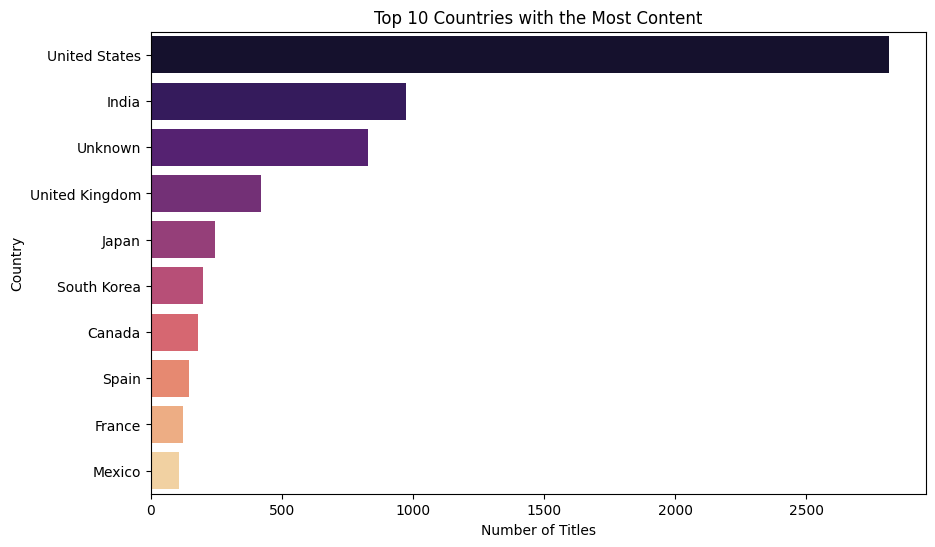

In [5]:
# Count the number of titles by country
top_countries = df['country'].value_counts().head(10)

# Plot the top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 10 Countries with the Most Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

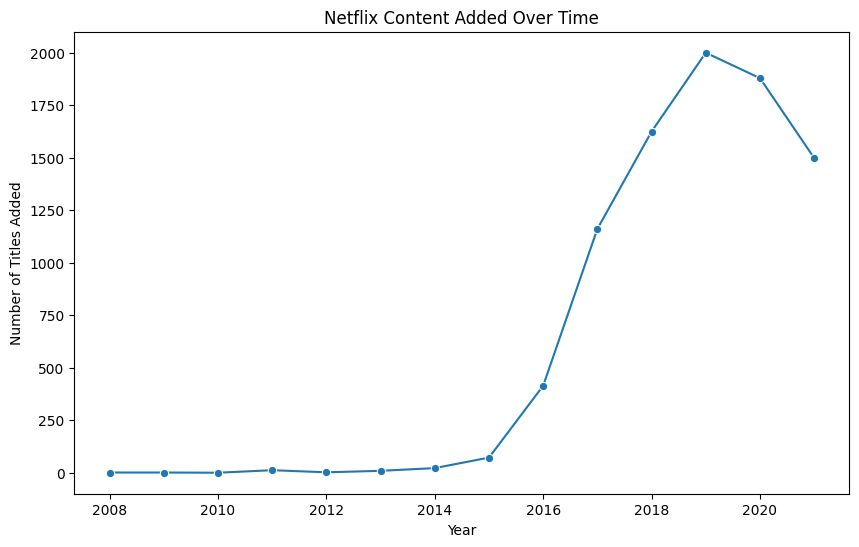

In [7]:
# Convert 'date_added' to datetime, handling errors and inconsistent formats
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', format='%B %d, %Y')

# Extract the year added
df['year_added'] = df['date_added'].dt.year

# Count the number of titles added each year
yearly_additions = df['year_added'].value_counts().sort_index()

# Plot the release trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_additions.index, y=yearly_additions.values, marker='o')
plt.title("Netflix Content Added Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()

<ipython-input-8-719e98a7353a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='plasma')


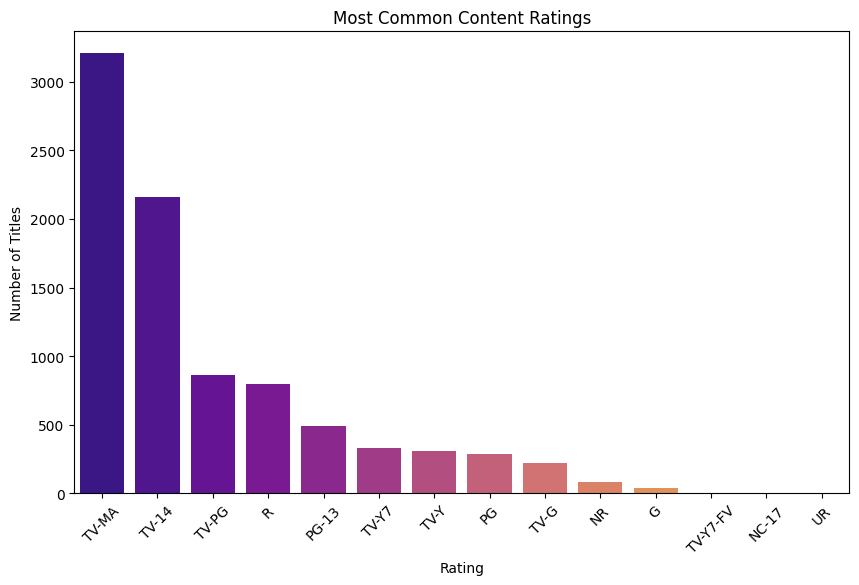

In [8]:
# Count the number of titles by rating
rating_counts = df['rating'].value_counts()

# Plot the most common ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='plasma')
plt.title("Most Common Content Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()